In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
dataset=pd.read_csv("titanic.csv")

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [5]:
dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

DATA CLEANING

In [7]:
#checking for missing values
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#imputing the missing values in Age column
dataset['Age'].fillna(dataset['Age'].median(), inplace=True)

C:\Users\divy2\AppData\Local\Temp\ipykernel_9060\855837166.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Age'].fillna(dataset['Age'].median(), inplace=True)


In [9]:
#imputing the missing values in Cabin column
dataset['Cabin'].fillna('Unknown',inplace=True)

In [10]:
#imputing the missing values in Embarked column
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0],inplace=True)

In [11]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [15]:
#remove duplicates
dataset.drop_duplicates(inplace=True)

In [16]:
# Convert categorical variables to appropriate data types
dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [17]:
categorical_columns = ['Sex', 'Embarked', 'Pclass']
for column in categorical_columns:
    dataset[column] = dataset[column].astype('category')


In [18]:
dataset.dtypes

PassengerId       int64
Survived          int64
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object

UNIVARIATE ANALYSIS

In [22]:
#no of people who survived(1) and who died(0)
survival_count=dataset['Survived'].value_counts()
survival_count

Survived
0    549
1    342
Name: count, dtype: int64

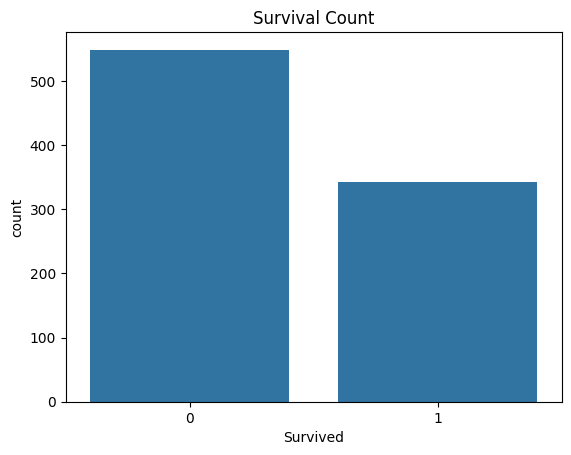

In [24]:
sns.countplot(data=dataset, x='Survived')
plt.title('Survival Count')
plt.show()

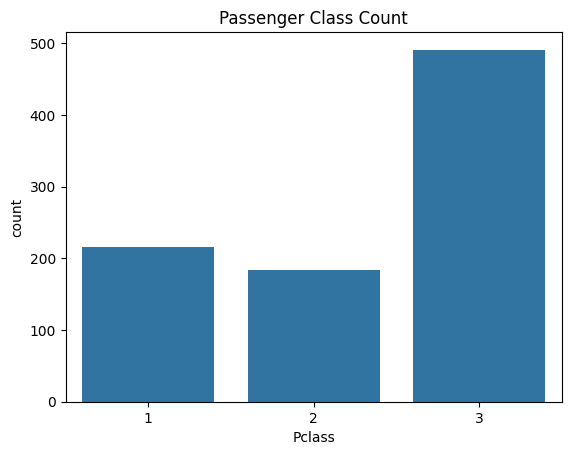

In [26]:
sns.countplot(data=dataset, x='Pclass')
plt.title('Passenger Class Count')
plt.show()

In [29]:
#gender count
dataset['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

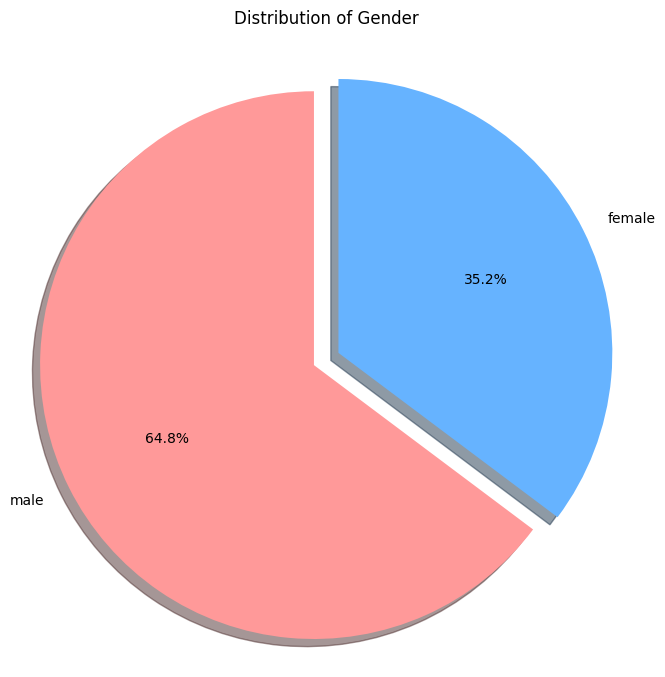

In [30]:
plt.figure(figsize=(8, 8))

# Calculate gender distribution
gender_counts = dataset['Sex'].value_counts()

# Define visual elements
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # Make first slice (male) stand out

plt.pie(gender_counts, 
        explode=explode,
        labels=gender_counts.index,
        colors=colors,
        autopct='%1.1f%%',
        shadow=True,
        startangle=90)

plt.title('Distribution of Gender', pad=20, size=12)
plt.axis('equal')
plt.show()

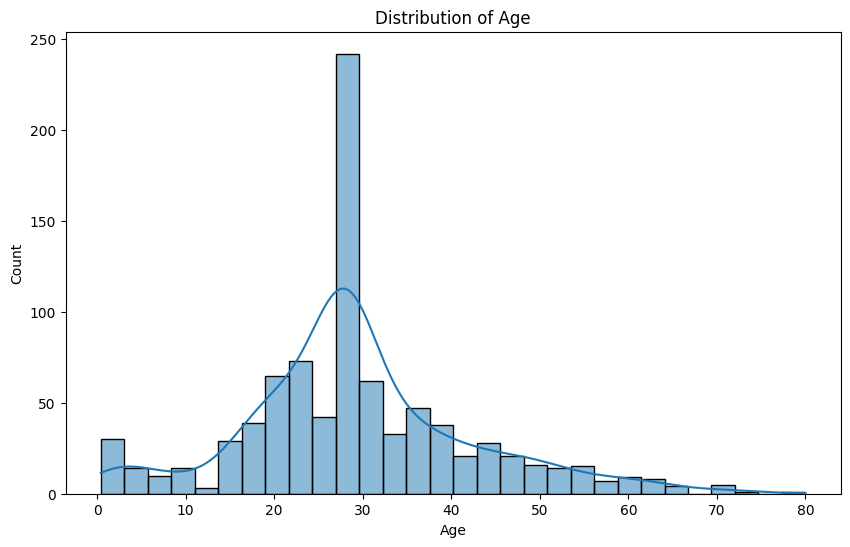

In [36]:
# Numerical Features
# Plot Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='Age', kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

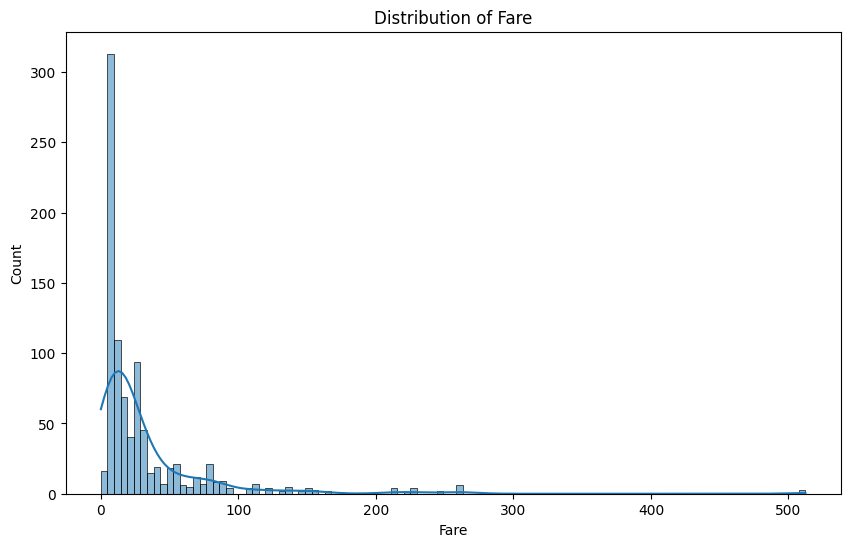

In [37]:
# Plot Fare Distribution 
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='Fare', kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Count') 
plt.show()

BIVARIATE ANALYSIS

In [40]:
#count of male and female who survived and who didnt survive
survival_count = dataset.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)
survival_count

C:\Users\divy2\AppData\Local\Temp\ipykernel_9060\2924950665.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_count = dataset.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)


Survived,0,1
Sex,,
female,81,233
male,468,109


In [43]:
# Calculate the percentage of survivors for each gender
male_survival_percentage = (survival_count.loc['male', 1] / survival_count.loc['male'].sum()) * 100
female_survival_percentage = (survival_count.loc['female', 1] / survival_count.loc['female'].sum()) * 100
print(male_survival_percentage)
print(female_survival_percentage)

18.890814558058924
74.20382165605095


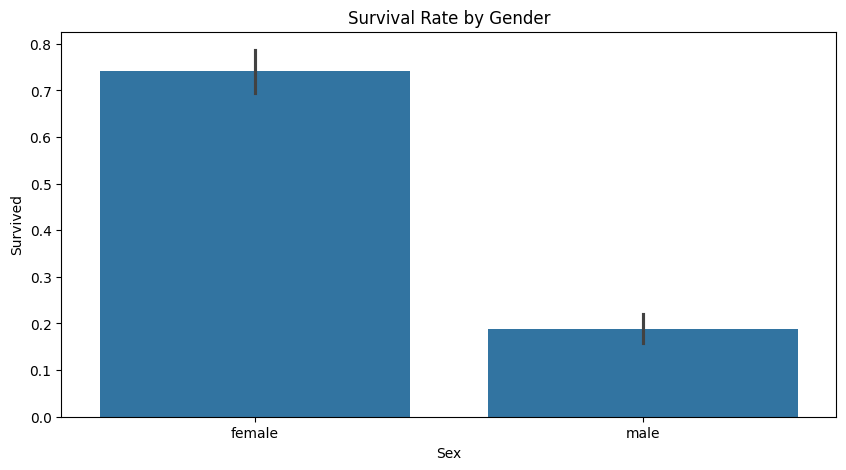

In [46]:
# Survival by Gender
plt.figure(figsize=(10, 5))
sns.barplot(data=dataset, x='Sex', y='Survived')
plt.title('Survival Rate by Gender')
plt.show()

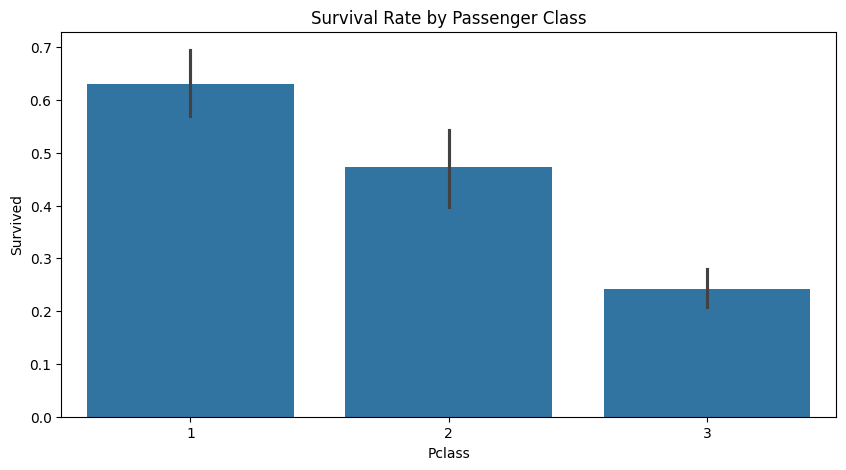

In [47]:
# Survival by Class
plt.figure(figsize=(10, 5))
sns.barplot(data=dataset, x='Pclass', y='Survived')
plt.title('Survival Rate by Passenger Class')
plt.show()

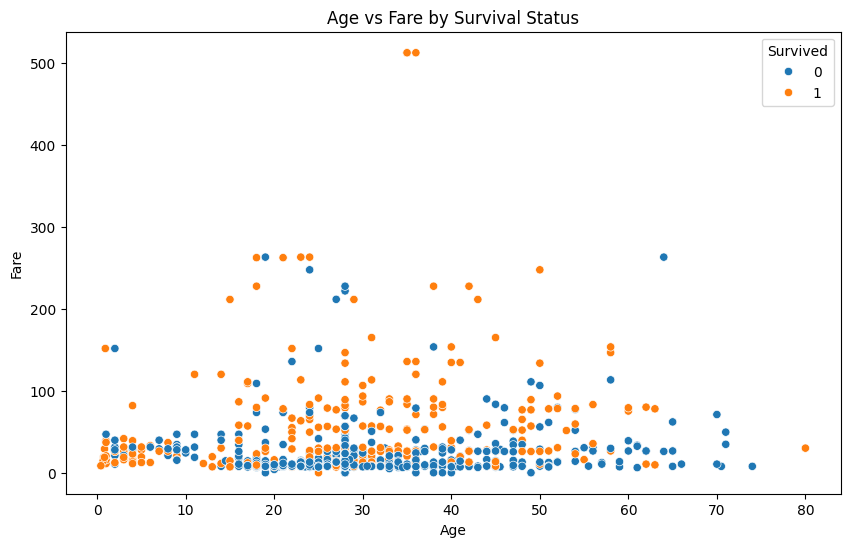

In [48]:
# Age vs Fare
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='Age', y='Fare', hue='Survived')
plt.title('Age vs Fare by Survival Status')
plt.show()


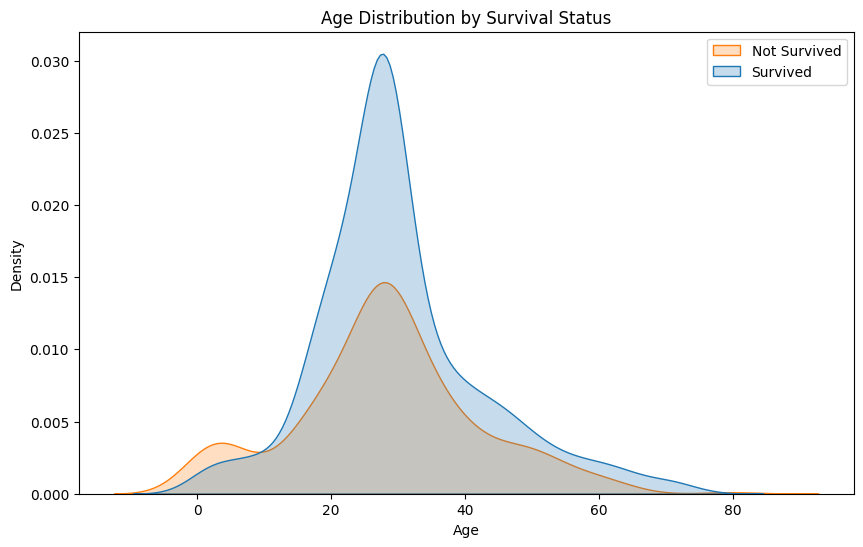

In [49]:
# 1. Age Distribution by Survival
plt.figure(figsize=(10, 6))
sns.kdeplot(data=dataset, x='Age', hue='Survived', fill=True)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(labels=['Not Survived', 'Survived'])
plt.show()

MULTIVARIATE ANALYSIS

In [57]:
# Group by Pclass and Sex, then calculate the mean survival rate
survival_df = dataset.groupby(['Pclass', 'Sex'])['Survived'].mean().reset_index()
# Rename the columns for better readability
survival_df.columns = ['Class', 'Gender', 'Survival Rate']
survival_df

C:\Users\divy2\AppData\Local\Temp\ipykernel_9060\3241398590.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_df = dataset.groupby(['Pclass', 'Sex'])['Survived'].mean().reset_index()


,Class,Gender,Survival Rate
0,1,female,0.968085
1,1,male,0.368852
2,2,female,0.921053
3,2,male,0.157407
4,3,female,0.500000
5,3,male,0.135447


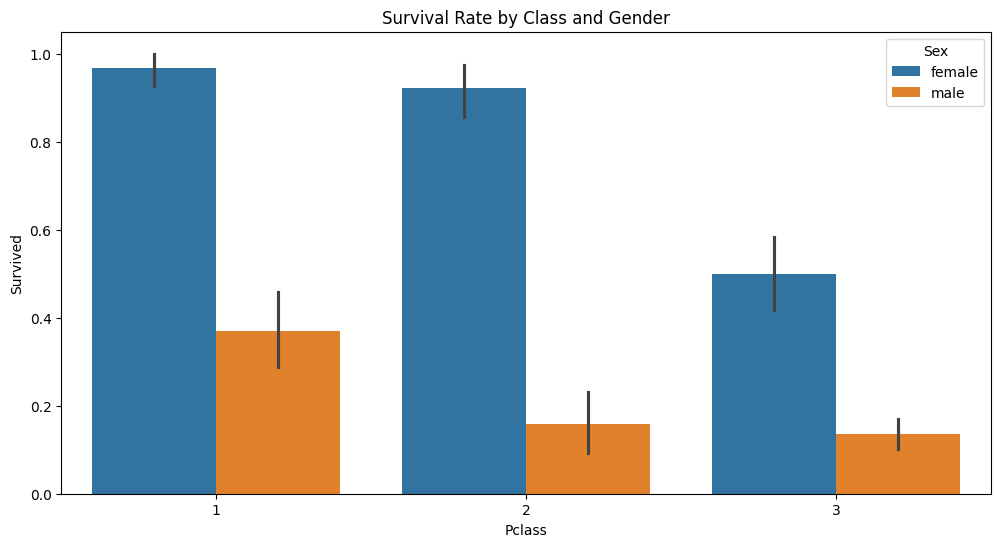

In [55]:
# Survival by Gender and Class
plt.figure(figsize=(12, 6))
sns.barplot(data=dataset, x='Pclass', y='Survived', hue='Sex')
plt.title('Survival Rate by Class and Gender')
plt.show()


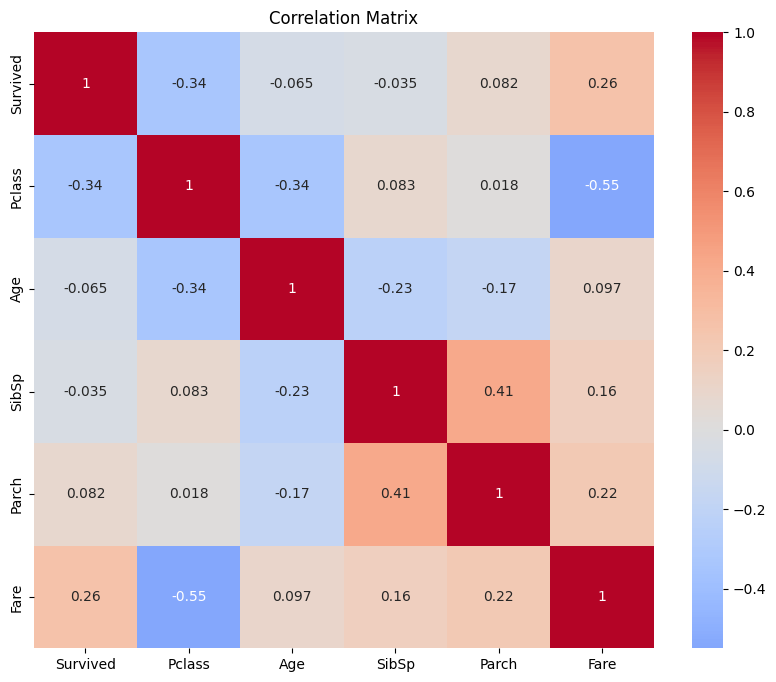

In [58]:
# Correlation Matrix
numerical_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
correlation_matrix = dataset[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


FEATURE ENGINEERING

In [60]:
# Extract titles from names
dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,Mr


In [63]:
# Create fare ranges
dataset['FareRange'] = pd.qcut(dataset['Fare'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FareRange
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,Mr,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Very High
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Miss,Medium
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Very High
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,Mr,Medium


In [64]:
# Create FamilySize feature
dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FareRange,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,Mr,Low,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Very High,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Miss,Medium,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Very High,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,Mr,Medium,1


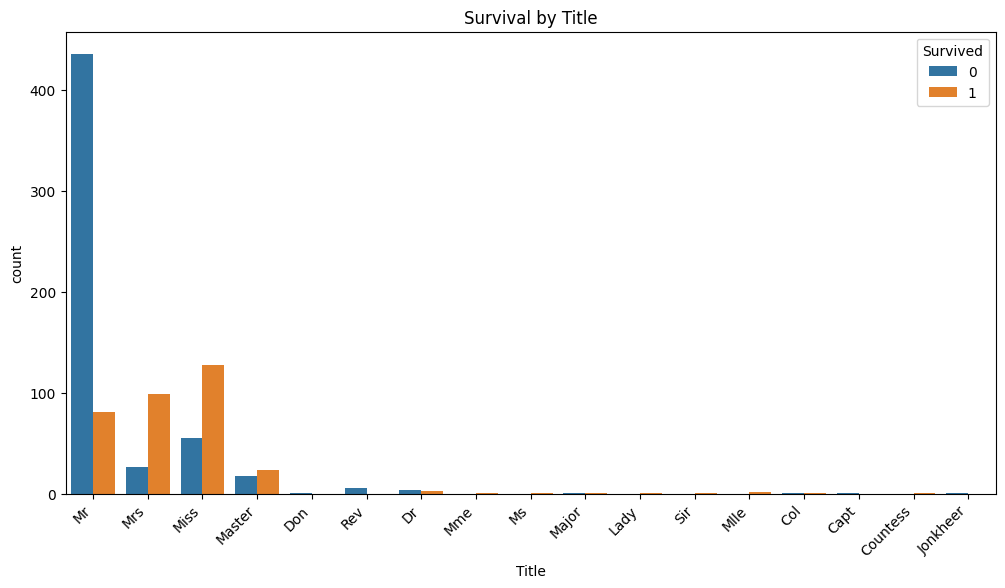

In [ ]:
# Create the count plot
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset, x='Title', hue='Survived')

# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')

# Set the title
plt.title('Survival by Title')

# Show the plot
plt.show()


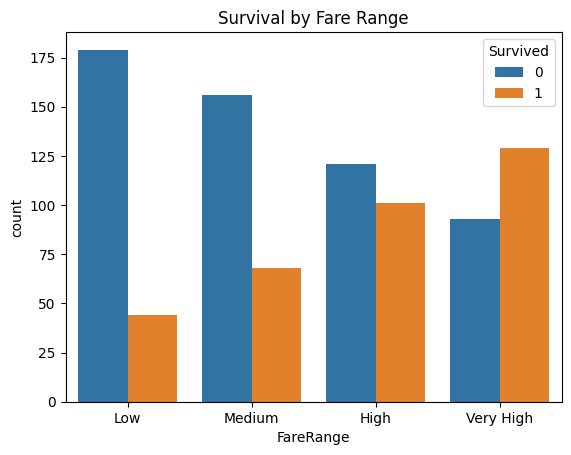

In [68]:
sns.countplot(data=dataset, x='FareRange', hue='Survived')
plt.title('Survival by Fare Range')
plt.show()

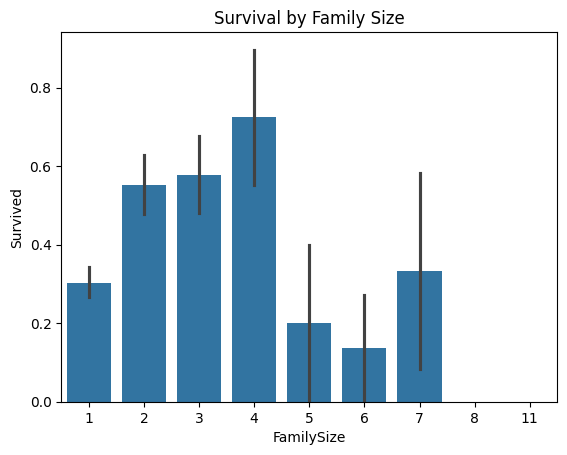

In [69]:
sns.barplot(data=dataset, x='FamilySize', y='Survived')
plt.title('Survival by Family Size')
plt.show()

In [70]:
# Calculate key statistics
survival_rate = dataset['Survived'].mean() * 100
female_survival_rate = dataset[dataset['Sex'] == 'female']['Survived'].mean() * 100
male_survival_rate = dataset[dataset['Sex'] == 'male']['Survived'].mean() * 100
first_class_survival_rate = dataset[dataset['Pclass'] == 1]['Survived'].mean() * 100
third_class_survival_rate = dataset[dataset['Pclass'] == 3]['Survived'].mean() * 100
average_age = dataset['Age'].mean()
average_fare = dataset['Fare'].mean()


print("\nKey Insights:")
print(f"Overall Survival Rate: {survival_rate:.2f}%")
print(f"Female Survival Rate: {female_survival_rate:.2f}%")
print(f"Male Survival Rate: {male_survival_rate:.2f}%")
print(f"First Class Survival Rate: {first_class_survival_rate:.2f}%")
print(f"Third Class Survival Rate: {third_class_survival_rate:.2f}%")
print(f"Average Age: {average_age:.2f}")
print(f"Average Fare: {average_fare:.2f}")


Key Insights:
Overall Survival Rate: 38.38%
Female Survival Rate: 74.20%
Male Survival Rate: 18.89%
First Class Survival Rate: 62.96%
Third Class Survival Rate: 24.24%
Average Age: 29.36
Average Fare: 32.20


INSIGHTS

1-SURVIVAL RATES:

a-Approximately 38% of passengers survived the disaster.
b-Females had a significantly higher survival rate compared to males (~74% of females survived, while only ~19% of males survived).


2-PASSENGER CLASS (Pclass):

a-Passengers in 1st class had the highest survival rate (~63%), followed by 2nd class (~47%), and 3rd class (~24%).
b-The likelihood of survival decreases with a lower passenger class.


3-AGE DISTRIBUTION

a-Most passengers were young adults between 20-40 years.
b-Children under 10 had a relatively higher survival rate, indicating priority given to children during evacuation.


4-GENDER AND CLASS INTERATION:

a-Females in 1st and 2nd class had the highest survival rates (~97% and ~92%, respectively).
b-Males in 3rd class had the lowest survival rate (~14%).


5-FARE

a-Higher fares were strongly correlated with higher survival rates. Passengers who paid higher fares (1st class) had better access to lifeboats and safety.


6-FAMILY SIZE

a-Passengers with a family size of 2-4 (e.g., small families) had higher survival rates. Those traveling alone (family size = 1) or in large families (family size > 4) had lower survival rates.